<a href="https://colab.research.google.com/github/Jorbnc/MAIA-DL/blob/master/Mini_Proyecto_2_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

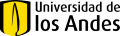

<style>
@import url('https://fonts.googleapis.com/css2?family=Latin+Modern+Roman:wght@400;700&display=swap');

body, p, h1, h2, h3, h4, h5, h6, li {
  font-family: 'Latin Modern Roman', serif;
}
code, pre {
  font-family: 'Fira Mono', monospace;
}
</style>

***

# **Mini Proyecto 2, Técnicas de *Deep Learning*: XXXX**

## **Descripción del problema:**

XXXXXX

## **Objetivo:**

XXXXX

## **Resumen:**

XXXX

***

**Este proyecto es realizado por Andrés Felipe Ñungo y Jordan Bryan Núñez Campos para entrega el 9 de mayo.**


# Tareas

* Exploración y pre-procesamiento (Jordan)

* Introducción, y explicación de las opciones tomadas en el PDF (Andrés y Jordan)

* Validar cual es mejor Word2vec o Glove (Andrés y Jordan)  Busqueda bibliográfica para explicar informe

* LSTM o GRU  (Andrés)

* Pensar en ideas visualización (Andrés y Jordan)

* Entrenamiento y evaluación de modelo (Andrés)


***
# **Índice**

El *notebook* abordará el proyecto de la siguiente manera:

| 🔹 | Sección        |
|----|----------------|
| 1️⃣ | **Instalación y carga de librerías** |
| 2️⃣ | **Análisis exploratorio y preparación de los datos**       |
| 3️⃣ | **Definición de *pipelines* de procesamiento**          |
| 3️⃣.1️⃣ | **Pipeline de preprocesamiento ...**   |
| 4️⃣ | **Desarrollo del modelo RNN...**   |
| 4️⃣.1️⃣ | **Hiperparámetros, partición y Dataloaders**   |
| 4️⃣.2️⃣ | **Adaptación a partir de la arquitectura ...*   |
| 4️⃣.3️⃣ | **Entrenamiento, validación y prueba**   |
| 5️⃣ | **Análisis de resultados y conclusiones**   |
| 6️⃣ | **Referencias**   |



***

# 1. Instalación y cargue de librerías

Empezamos por el cargue de las librerias que se usarán para efectos de este proyecto. Estas incluyen:

* Librerías comunes para la lectura, procesamiento y ploteo básico de las imágenes.
* **`kagglehub`**, para poder descargar el dataset del miniproyecto de forma conveniente
* **`pytorch`** (de acuerdo, a la sugerencia del enunciado del proyecto) ....

In [1]:
pip install kagglehub # Necesario para ejecutarse en Coursera

In [2]:
# Librerías comunes
import os
import pandas as pd
import numpy as np
import random
import time

# Obtención de la información
import kagglehub
from PIL import Image

# Librerías usadas para la preparación de los datos
import hashlib

# Modelado
import torch
import torch.nn as nn
from torch.utils.data import Dataset, random_split, DataLoader
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
import copy

# Librerías básicas
import pandas as pd
import numpy as np
from collections import Counter

# Librerías NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
import spacy

# Tratamiento de textos en diferentes idiomas
from langdetect import detect
from googletrans import Translator

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD

# Visualización
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import matplotlib.cm as cm
%matplotlib inline

ModuleNotFoundError: No module named 'langdetect'

In [ ]:
# Descarga de palabra vacías
nltk.download('stopwords')

In [ ]:
# Ignorar las warnings
import warnings
warnings.filterwarnings("ignore")

# Versiones utilizadas
from importlib.metadata import version
librerias = ['numpy', 'pandas', 'torch', 'torchvision', 'scikit-learn', 'kagglehub', 'pillow','matplotlib','seaborn']
for library in librerias:
  print(library, ": ", version(library))

numpy :  2.0.2
pandas :  2.2.2
torch :  2.6.0+cu124
torchvision :  0.21.0+cu124
scikit-learn :  1.6.1
kagglehub :  0.3.12
pillow :  11.2.1
matplotlib :  3.10.0
seaborn :  0.13.2


El siguiente bloque de código nos permite hacer determininísticas las funciones traídas de **`pytorch`**, y en general controlar todos los pseudo-aleatorios del *notebook*

In [ ]:
# Definición del random state y seeds
RANDOM_STATE = 13
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

***

# 2. Análisis exploratorio y preparación de los datos


***

## 2.1. Carga y estadísticas generales

XXXXXXX   Esto se detalla posteriormente en la sección **Pipeline de Preprocesamiento**.

In [ ]:
# Descargar el conjunto de datos y almacenar el path en una variable
path_kaggle = kagglehub.dataset_download("yasserh/imdb-movie-ratings-sentiment-analysis")
print("Ruta:", path_kaggle)

Ruta: /kaggle/input/brain-tumor-mri-scans


Una vez teniendo esta información pre-cargada, hacemos un breve análisis de nuestro conjunto de datos. Empezando por la distribución de las clases:

In [ ]:
data_raw.shape

In [ ]:
data = data_raw.copy()
data.isna().sum()

In [ ]:
data.duplicated().sum()

In [ ]:
# # Nombres de las clases
# ods = np.array([
#     "Fin de la pobreza", "Hambre cero", "Salud y bienestar", "Educación de calidad", "Igualdad de género",
#     "Agua limpia y saneamiento", "Energía asequible y no contaminante", "Trabajo decente y crecimiento económico",
#     "Industria, innovación e infraestructura", "Reducción de las desigualdades", "Ciudades y comunidades sostenibles",
#     "Producción y consumo responsables", "Acción por el clima", "Vida submarina", "Vida de ecosistemas terrestres",
#     "Paz, justicia e instituciones sólidas"
# ])
# counts = data['ODS'].value_counts()
# # Plot del número de documentos por categoría
# fig, ax = plt.subplots(1, 1, figsize=(5,5))
# norm = plt.Normalize(vmin=counts.min(), vmax=counts.max())
# colors = cm.viridis(norm(counts))
# ax.barh(range(0,16), counts,color=colors)
# ax.set_yticks(range(0,16), labels=[ods[l-1] + f" ({l})" for l in counts.index])
# ax.invert_yaxis()
# fig.show()

xxxxxx

Idiomas xxxx

In [ ]:
# #Identifica el Idioma de cada fila
# def identificar_idioma(X: pd.DataFrame):
#     X["idioma"] = X['textos'].apply(lambda x: detect(x) if isinstance(x, str) and x.strip() else "desconocido")
#     return X

# X_deteccion = identificar_idioma(data)
# print(X_deteccion['idioma'].value_counts())

In [ ]:
# indices_a_traducir = data[data['idioma'] != 'es'].index
# translator = Translator()

# # Traducción hecha con google translate
# def traducir_texto_fila(fila):
#     texto = fila['textos']
#     idioma_original = fila['idioma']
#     if isinstance(texto, str) and texto.strip():
#         return translator.translate(texto, src=idioma_original, dest="es").text
#     return texto

# # Aplicando la traducción
# data.loc[indices_a_traducir, 'textos'] = data.loc[indices_a_traducir].apply(traducir_texto_fila, axis=1)

# # Ahora los textos han sido traducios al español
# for texto in data.loc[indices_a_traducir, 'textos']:
#     print(texto, "\n")

In [ ]:
# nltk_stopwords_set = set(stopwords.words("spanish"))

In [ ]:
# def preprocesamiento_exploratorio(X: pd.DataFrame):
#     # Tokenizar a nivel de palabra y pasar a minúsculas
#     tokenizer = RegexpTokenizer(r"\b[a-zA-ZáéíóúüñÁÉÍÓÚÜÑ'-]+")

#     X_preprocesado = X.apply(lambda x: tokenizer.tokenize(x))
#     X_preprocesado = [[t.lower() for t in text] for text in X_preprocesado]

#     # Filtrar palabras vacías
#     X_preprocesado = [[token for token in text if token not in nltk_stopwords_set] for text in X_preprocesado]
#     texto_nube = ' '.join(word for text in X_preprocesado for word in text)
#     return texto_nube

In [ ]:
# #Visualización inicial de las palabras que contienen los documentos.
# texto_nube = preprocesamiento_exploratorio(X_train['textos'])

# # Generación Nube de Palabras
# wordcloud = WordCloud(
#     width=800,
#     height=400,
#     background_color ='white',
#     min_font_size=10,
#     max_font_size=110,
#     max_words=100
# ).generate(texto_nube)
# plt.figure(figsize=(10, 10))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

In [ ]:
# #Conversión a dataframe
# def palabras_a_dataframe(texto):
#     palabras = texto.split()  # Dividir el texto en palabras por espacios
#     conteo = Counter(palabras)  # Contar ocurrencias de cada palabra
#     df = pd.DataFrame(conteo.items(), columns=['Palabra', 'Frecuencia'])
#     df = df.sort_values(by='Frecuencia', ascending=False).reset_index(drop=True)  # Ordenar y resetear índice
#     return df

# conteo_palabras = palabras_a_dataframe(texto_nube)
# conteo_top = conteo_palabras.head(20)

# # Top 20 palabras
# plt.figure(figsize=(5, 5))
# sns.barplot(x=conteo_top["Frecuencia"], y=conteo_top["Palabra"], palette="viridis")
# plt.xlabel("Frecuencia")
# plt.ylabel("Palabra")
# plt.title(f"Top {20} Palabras más Frecuentes")
# plt.show()

In [ ]:
# counts = data['ODS'].value_counts()
# counts_train = y_train.value_counts()

# # Gráfica de la proporcionalidad de las clases y los conjuntos divididos
# fig, ax = plt.subplots(1, 1, figsize=(5,5))
# ax.barh(range(0,16), counts, label="Test")
# ax.barh(range(0,16), counts_train, label="Train")
# ax.set_yticks(range(0,16), labels=[ods[l-1] + f" ({l})" for l in counts.index])
# ax.invert_yaxis()
# plt.title("Distribución del split estratificado")
# plt.legend()
# fig.show()

El objetivo de esta sección es incorporar varios estilos de pre-procesamiento, probar diferentes maneras de depurar los textos como por ejemplo remover caracteres no alfanuméricos, a excepción de guiones o apóstrofes. También haremos uso de dos normalizadores: *Stemming* y *Lemmatization*, ....

***

# 3. Definición de *pipelines* de procesamiento

***

## 3.1. *Pipeline* de preprocesamiento

...

...

In [ ]:
# Pipeline de preprocesamiento recomendado
transform_pipeline = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize(256),
    transforms.RandomRotation(15),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((gray_mean,), (gray_std,))
])

# Pipeline con Stemming, sin depuración de palabras
pipeline_stem = Pipeline([
    ('preprocesador', preprocesador(normalizer=normalizer_stem)),
    ('vectorizer', TfidfVectorizer()),
])

In [ ]:
# Stemming
stemmer = SnowballStemmer("spanish")
normalizer_stem = lambda tokens: [stemmer.stem(t) for t in tokens]

# Lemmatization
nlp = spacy.load("es_core_news_sm")
normalizer_lemma = lambda tokens: [t.lemma_ for t in nlp(" ".join(tokens))]

***

# 4. Desarrollo del modelo RNN....

***

## 4.1. Hiperparámetros, partición y *DataLoaders*

XXXXX

Se usa una partición **80/10/10** para los datos de entrenamiento, validación y *test*, respectivamente. También se define **`device`** que nos permitirá ir alternado el uso de GPU y de CPU.

In [ ]:
# # Trabajar en GPU/CPU
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Partición de los datos
# size_dataset  = len(dataset)
# size_entrenmiento = int(0.8 * size_dataset)
# size_validacion = int(0.1 * size_dataset)
# size_test = size_dataset - size_entrenmiento - size_validacion
# dataset_train, dataset_val, dataset_test = random_split(
#     dataset,
#     [size_entrenmiento, size_validacion, size_test],
#     generator=torch.Generator().manual_seed(RANDOM_STATE)
# )

# # Carga "lazy" de las particiones
# train_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
# val_loader   = DataLoader(dataset_val,   batch_size=batch_size, shuffle=False)
# test_loader  = DataLoader(dataset_test,  batch_size=batch_size, shuffle=False)

***

## 4.2. Adaptación a partir ...
</span>

***
### 4.2.1 Modelo: ...

... s capaz de detectar tanto bordes como patrones complejos. Además, al estar pre-entrenado en *ImageNet*, acelera y facilita la adaptación a nuestra nueva tarea. No obstante, dado que trabajamos con un conjunto de datos ...

In [ ]:
# # Cargar modelo
# model = models.alexnet(pretrained=True)

# # Número de parámetros de la arquitectura sin modificaciones
# total_parametros = sum(p.numel() for p in model.parameters())
# print(f"Total parametros {total_parametros:,}\n")

# # Observamos la arquitectura del modelo original
# model

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 80.4MB/s]


Total parametros 61,100,840



AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

El modelo resultante tiene en total **`22,381,764`** parámetros entrenables que serán ajustados al dataset, buscando una buena generalización mediante early stopping.

***

## 4.3. Entrenamiento, validación y prueba

xxxxxx


In [ ]:
# # Cargar al device elegido
# model = model.to(device)

In [ ]:
# # Función de pérdida y optimizador
# loss_f = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=5e-5)

In [ ]:
# # Función para calcular el accuracy
# def evaluar_modelo_accuracy(m):
#   # Modo evaluación
#   m.eval()
#   correctos, total = 0, 0
#   # Desactivar ajuste de parámetros y calcular accuracy
#   with torch.no_grad():
#     for imgs, labels in test_loader:
#         imgs, labels = imgs.to(device), labels.to(device)
#         logits = m(imgs)
#         # Obtener el índice (clase) de logit máximo a lo largo de la dim=1
#         _, predicciones = torch.max(logits, 1)
#         # Actualización iterativa del accuracy
#         correctos += (predicciones == labels).sum().item()
#         total += labels.size(0)
#   return correctos / total * 100

In [ ]:
# train_loss_acumulado = []
# val_loss_acumulado = []
# accuracy_acumulado = []

# # Las siguientes variables forman parte de la implementación de Early Stopping:
# # Copia inicial del estado del modelo
# pesos_mejor_modelo = copy.deepcopy(model.state_dict())
# # 'mejor loss'. Se inicializa en un valor infinto positivo
# mejor_loss_val  = float('inf')
# # Contador de epochs sin mejora significativa
# epochs_sin_mejora = 0

# start_time = time.time()
# # Loop de entrenamiento con Early Stopping
# for epoch in range(1, num_epochs+1):

#     # Entrenamieto
#     model.train() # Cambia a modo de entrenamiento y permite Dropout
#     loss_acumulada = 0.0
#     for imgs, labels in train_loader:
#         imgs, labels = imgs.to(device), labels.to(device)
#         # Backpropagation y Ajuste de parámetros
#         optimizer.zero_grad()
#         outputs = model(imgs)
#         loss = loss_f(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         loss_acumulada += loss.item() * imgs.size(0)

#     # Métrica de entrenamiento para la epoch actual
#     train_loss = loss_acumulada / len(train_loader.dataset)
#     train_loss_acumulado.append(train_loss)

#     # Validación
#     model.eval()
#     val_loss = 0.0
#     # Desactiva la actualización de parámetos (no gradient) y activa el modo inferencia
#     with torch.no_grad():
#         for imgs, labels in val_loader:
#             imgs, labels = imgs.to(device), labels.to(device)
#             outputs = model(imgs)
#             loss = loss_f(outputs, labels)
#             val_loss += loss.item() * imgs.size(0)
#     val_loss /= len(val_loader.dataset)
#     val_loss_acumulado.append(val_loss)

#     # Prueba iterativa
#     acc = evaluar_modelo_accuracy(model)
#     accuracy_acumulado.append(acc)

#     # Early stopping
#     # Si es que hay mejoría...
#     if val_loss < mejor_loss_val:
#         # ...actualizar el mejor loss
#         mejor_loss_val = val_loss
#         pesos_mejor_modelo = copy.deepcopy(model.state_dict())
#         # Y reiniciar el contador de epochs
#         epochs_sin_mejora = 0
#         print(f"Epoch {epoch}/{num_epochs}, Train Loss: {train_loss:.4f},  Val Loss: {val_loss:.4f} --> Nueva mejor métrica (Test Accuracy: {acc:.2f}%)")
#     # En caso contrario, seguir iterando hasta superar el umbral o finalizar todas las epochs
#     else:
#         epochs_sin_mejora += 1
#         print(f"Epoch {epoch}/{num_epochs}, Train Loss: {train_loss:.4f},  Val Loss: {val_loss:.4f} (Test Accuracy: {acc:.2f}%)")
#         if epochs_sin_mejora >= umbral_epochs:
#             print(f"→ Early stopping después de {epoch} epochs.")
#             break

# end_time = time.time()
# print(f"Completado en {(end_time - start_time) / 60.0} minutos.")

Epoch 1/50, Train Loss: 0.5282,  Val Loss: 0.3255 --> Nueva mejor métrica (Test Accuracy: 86.69%)
Epoch 2/50, Train Loss: 0.2598,  Val Loss: 0.1702 --> Nueva mejor métrica (Test Accuracy: 93.80%)
Epoch 3/50, Train Loss: 0.1929,  Val Loss: 0.2059 (Test Accuracy: 91.38%)
Epoch 4/50, Train Loss: 0.1418,  Val Loss: 0.1412 --> Nueva mejor métrica (Test Accuracy: 95.31%)
Epoch 5/50, Train Loss: 0.1069,  Val Loss: 0.1099 --> Nueva mejor métrica (Test Accuracy: 95.61%)
Epoch 6/50, Train Loss: 0.0870,  Val Loss: 0.1290 (Test Accuracy: 95.31%)
Epoch 7/50, Train Loss: 0.0713,  Val Loss: 0.1012 --> Nueva mejor métrica (Test Accuracy: 96.07%)
Epoch 8/50, Train Loss: 0.0551,  Val Loss: 0.1032 (Test Accuracy: 97.13%)
Epoch 9/50, Train Loss: 0.0505,  Val Loss: 0.0928 --> Nueva mejor métrica (Test Accuracy: 95.76%)
Epoch 10/50, Train Loss: 0.0356,  Val Loss: 0.0822 --> Nueva mejor métrica (Test Accuracy: 97.73%)
Epoch 11/50, Train Loss: 0.0256,  Val Loss: 0.1012 (Test Accuracy: 96.22%)
Epoch 12/50, Tra


## Prueba piloto de los clasificadores...



***


# 5. Análisis de resultados y conclusiones

xxxxx calculando *Accuracy*, *Recall*, *F1-macro* y la *Matriz de confusión*xxxx

In [ ]:
# #Devuelve y_true, y_pred, accuracy y F1-macro.
# def evaluar_test(modelo, loader, device):

#     modelo.eval()
#     y_true, y_pred = [], []

#     with torch.no_grad():
#         for x, y in loader:
#             x, y = x.to(device), y.to(device)
#             logits = modelo(x)
#             _, pred = torch.max(logits, 1)
#             y_true.extend(y.cpu().numpy())
#             y_pred.extend(pred.cpu().numpy())
#     # Accuracy
#     acc  = accuracy_score(y_true, y_pred)
#     # F1 multi-clase
#     f1   = f1_score(y_true, y_pred, average='macro')  #
#     cm   = confusion_matrix(y_true, y_pred)
#     return acc, f1, cm, y_true, y_pred


Resultados en TEST
‣ Accuracy :  97.88%
‣ F1-macro :  0.978


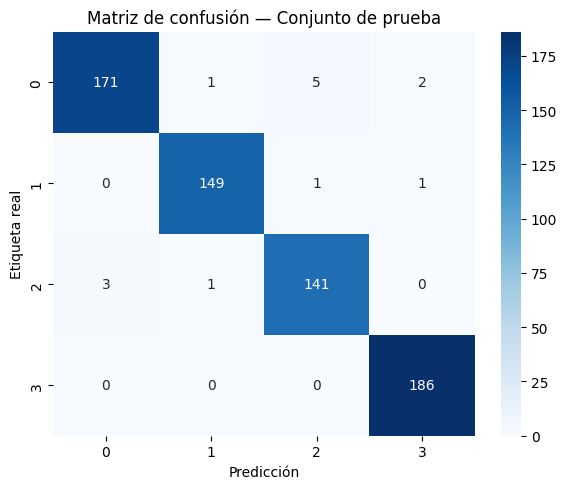

In [ ]:
# # Evaluar sobre test
# acc_test, f1_test, cm_test, y_true, y_pred = evaluar_test(model, test_loader, device)

# # Print métricas
# print("\nResultados en TEST")
# print(f"‣ Accuracy : {acc_test*100:6.2f}%")
# print(f"‣ F1-macro : {f1_test:6.3f}")


# # Convierte cada etiqueta a int
# class_ids   = sorted(set(y_true))
# class_names = [str(c) for c in class_ids]

# # Plot matriz de confusión
# plt.figure(figsize=(6, 5))
# sns.heatmap(cm_test,
#             annot=True, fmt='d', cmap='Blues',
#             xticklabels=class_names,
#             yticklabels=class_names)
# plt.xlabel("Predicción")
# plt.ylabel("Etiqueta real")
# plt.title("Matriz de confusión — Conjunto de prueba")
# plt.tight_layout()
# plt.show()

XXXXXX

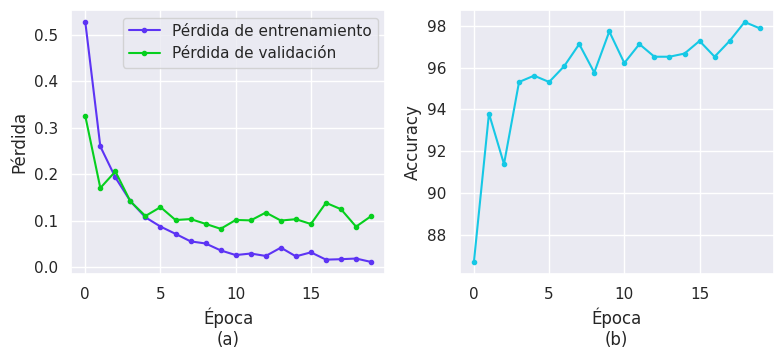

In [ ]:
# sns.set(style="darkgrid")

# fig, axes = plt.subplots(1, 2, figsize=(8, 3.75))

# axes[0].plot(train_loss_acumulado, label='Pérdida de entrenamiento', color = '#5d34f4', marker = ".", lw= 1.5)
# axes[0].plot(val_loss_acumulado, label='Pérdida de validación', color = '#06cf1e', marker = ".", lw= 1.5)
# axes[0].set_xlabel('Época\n(a)')
# axes[0].set_ylabel('Pérdida')
# axes[0].legend()
# #axes[0].set_title('Pérdidas de entrenamiento y validación')

# axes[1].plot(accuracy_acumulado, label='Test Accuracy', color='#16c8e5', marker = ".")
# axes[1].set_xlabel('Época\n(b)')
# axes[1].set_ylabel('Accuracy')
# #axes[1].set_title('Test Accuracy')

# plt.tight_layout()
# plt.savefig("resultados_plot.png", dpi=300)

Teniendo en cuenta el análisis anterior se procede a generar algunos ejemplos de las clasificación obtenida a partir del modelo CNN entrenado

***


# 6. Referencias


[¹] **Pytorch, entrenando un clasificador**  
Disponible en: [Pytorch.org](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

[²] **MRI sequences (overview), Radiopaedia.org**  
Disponible en: [radiopaedia.org](https://radiopaedia.org/articles/mri-sequences-overview?embed_domain=staging.radpair.comfavicon.icofavicon.icoradiopaedia-icon-144.png&lang=us)

[³] **Image Normalization in PyTorch**  
Disponible en: [medium.com](https://medium.com/%40piyushkashyap045/image-normalization-in-pytorch-from-tensor-conversion-to-scaling-3951b6337bc8)

[⁴] **Harnessing Python and SHA-256: An intuitive guide to removing duplicate files**  
Disponible en: [medium.com](https://medium.com/gitconnected/harnessing-python-and-sha-256-an-intuitive-guide-to-removing-duplicate-files-d3b02e0b3978)